<b>Homework02-Multi-variate Linear regression from scratch
>Keivn Yang 50541650

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
np.random.seed(2019)
from sklearn.datasets import make_regression

In [2]:
def multi_linear_function(x, coeffs):
    return X @ np.array(coeffs[1:]) + coeffs[0]

In [3]:
def gaussian_noise(mu=0, sigma=1):
    return np.random.normal(mu, sigma)

In [4]:
def add_noise(values, **args):
    return np.apply_along_axis(lambda x: x + gaussian_noise(**args), 0, values)

In [5]:
X, y_clean = make_regression(200, 5, n_informative=5, bias=-1.7, noise=0, shuffle=False)
ordering = np.argsort(y_clean)
y_clean = y_clean[ordering]
X = X[ordering]

In [6]:
noise = np.random.normal(scale=15,size=(len(y_clean),))

In [7]:
y = y_clean + noise

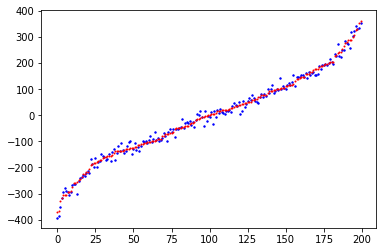

In [8]:
plt.scatter(range(len(y)), y, color="blue", s=2)
plt.scatter(range(len(y_clean)), y_clean, s=1, color="red")
plt.show()

In [9]:
X_expanded = np.ones((X.shape[0], X.shape[1]+1))
X_expanded[:,1:] = X

[[ 1.         -0.36876931  0.52380498 -1.19001556 -2.22331742 -1.2539314 ]
 [ 1.         -0.38277332  1.90791857 -1.63913194 -2.02917836 -1.24535835]
 [ 1.         -1.17798276  0.59170913 -0.18490338 -2.71970712 -0.53524768]
 [ 1.         -2.12897969  0.43778213 -1.86902164 -0.81993769  0.92231189]
 [ 1.         -1.89045058  0.66557661  0.32985171 -1.86578164 -1.76061858]]
200


In [10]:
temp = (X_expanded.T.dot(X_expanded))
Winv = inv(temp)
tem = X_expanded.T.dot(y.T)
W = Winv.dot(tem)

In [11]:
print(W)

[-1.79585884 57.7942737  23.4247432  95.80465354 83.61960995 47.76548132]


In [16]:
y_pred = np.zeros(y.shape)
for i in range(X.shape[0]):
    y_pred[i] = W[5]*X[i,4]+ W[4]*X[i,3] + W[3]*X[i,2]+ W[2]*X[i,1] + W[1]*X[i,0] + W[0]

[-370.65521636 -365.42617374 -326.71769752 -318.15292903 -303.97351393
 -306.36468326 -304.7211054  -297.61960246 -294.68533084 -291.51021371
 -275.50909985 -257.86127439 -257.09781736 -256.76698516 -248.3612002
 -242.14704701 -236.23093995 -228.93992493 -223.47087039 -220.11110524
 -214.64137056 -204.0445402  -190.53946874 -186.96380498 -187.15134017
 -182.52529731 -177.33351101 -173.91045371 -173.7808949  -173.50706766
 -165.32397595 -161.08621495 -158.58286855 -155.77337234 -157.60318063
 -154.82355158 -151.85743659 -147.44187333 -139.24632855 -137.89671054
 -135.16845989 -137.29076976 -134.60514989 -134.91744596 -133.99173479
 -129.25143848 -128.65961511 -122.70730371 -124.04347821 -125.19666966
 -123.91246746 -122.82832568 -122.25775387 -116.64062549 -113.54991367
 -112.4514903  -108.49151125 -107.98357981 -104.41201847 -105.74677828
 -103.35048063 -103.110446   -102.06020126 -101.7972982   -95.24502121
  -96.5607624   -93.74093309  -88.65415107  -92.5607528   -79.81106644
  -78.1

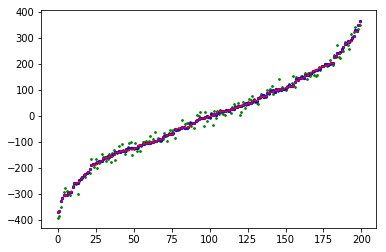

In [21]:
plt.scatter(range(len(y)),y,color="green",s=3)
plt.scatter(range(len(y_pred)),y_pred,color="blue",s=5)
plt.scatter(range(len(y_clean)),y_clean,s=1,color="red")
plt.show()

In [25]:
tem_result=0
i =0
for i in range(X.shape[0]):
    tem_result = tem_result +((y[i]-y_pred[i])*(y[i]-y_pred[i]))
MSE = tem_result / 200
print(MSE)

210.76595972440876


In [26]:
tem_result1 = 0
i = 0
for i in range(X.shape[0]):
    tem_result1 = tem_result1 + ((y[i] - y_pred[i]) / y[i])
MPE = tem_result1 * 100/200
print(MPE)

-15.917681162761607


In [27]:
SSres = tem_result
avg_y = 0
i = 0
for i in range(X.shape[0]):
    avg_y = avg_y + y[i]
    
    
avg_y = avg_y / X.size
tem = 0
i = 0
for i in range(X.shape[0]):
    tem = tem + ((y[i]-avg_y) * (y[i]-avg_y))
SStot = tem
R2 = 1- (SSres/SStot)
print(R2)

0.9919300415091785
